## This is a file that complete classifiaction work with different methods on preprocessed dataset

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn as sk
import sklearn.preprocessing as skp
import os
from pathlib import Path

In [4]:
project_root =  Path(os.getcwd()).parent
file_path = project_root/ 'EDA'/ 'df_preprocessed3.csv'
df = pd.read_csv(file_path) # most robust way to define

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 133640 entries, 0 to 133639
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   PC2     133640 non-null  float64
 1   PC1     133640 non-null  float64
 2   PC4     133640 non-null  float64
 3   PC3     133640 non-null  float64
 4   PC5     133640 non-null  float64
 5   Class   133640 non-null  object 
dtypes: float64(5), object(1)
memory usage: 6.1+ MB


In [5]:
# logsitic regression

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix

X = df.drop('Class', axis=1)
y = df['Class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Model Performance:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

/home/hty/anaconda3/envs/CV_env/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:1247: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. From then on, it will always use 'multinomial'. Leave it to its default value to avoid this warning.
  warnings.warn(


Model Performance:

Classification Report:
              precision    recall  f1-score   support

          No       0.48      0.61      0.54     10560
       Short       0.51      0.39      0.45      9283
 Substantial       0.69      0.63      0.66      6885

    accuracy                           0.54     26728
   macro avg       0.56      0.55      0.55     26728
weighted avg       0.55      0.54      0.54     26728


Confusion Matrix:
[[6450 2797 1313]
 [5029 3650  604]
 [1855  666 4364]]


In [5]:
# Decision Tree

from sklearn.tree import DecisionTreeClassifier, plot_tree

dt_model = DecisionTreeClassifier(
        random_state=42,
        max_depth=5,  # Prevent overfitting
        min_samples_split=5,
        min_samples_leaf=2
    )
    
dt_model.fit(X_train, y_train)
    

y_pred = dt_model.predict(X_test)
    
  
feature_importance = pd.DataFrame({
    'feature': X.columns,
    'importance': dt_model.feature_importances_
}).sort_values('importance', ascending=False)
    

print("Model Performance:")
print("\nClassification Report:")
print(classification_report(y_test, y_pred))
    
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Model Performance:

Classification Report:
              precision    recall  f1-score   support

          No       0.50      0.74      0.60     10560
       Short       0.53      0.19      0.28      9283
 Substantial       0.64      0.73      0.68      6885

    accuracy                           0.55     26728
   macro avg       0.56      0.55      0.52     26728
weighted avg       0.55      0.55      0.51     26728


Confusion Matrix:
[[7806  800 1954]
 [6652 1793  838]
 [1058  818 5009]]


X shape: (133640, 6)
y shape: (133640,)
Iteration 0, Cost: 0.6931471785599453
Iteration 10, Cost: 12.443728775546584
Iteration 20, Cost: 12.439232776121557
Iteration 30, Cost: 12.431750838482591
Iteration 40, Cost: 12.432767395701974
Iteration 50, Cost: 12.43081437249552
Iteration 60, Cost: 12.409106430530999


/tmp/ipykernel_65926/2758841337.py:12: RuntimeWarning: overflow encountered in exp
  return 1 / (1 + np.exp(-z))


Iteration 70, Cost: 12.400083318674248
Iteration 80, Cost: 12.384834068707368
Iteration 90, Cost: 12.370877604262459


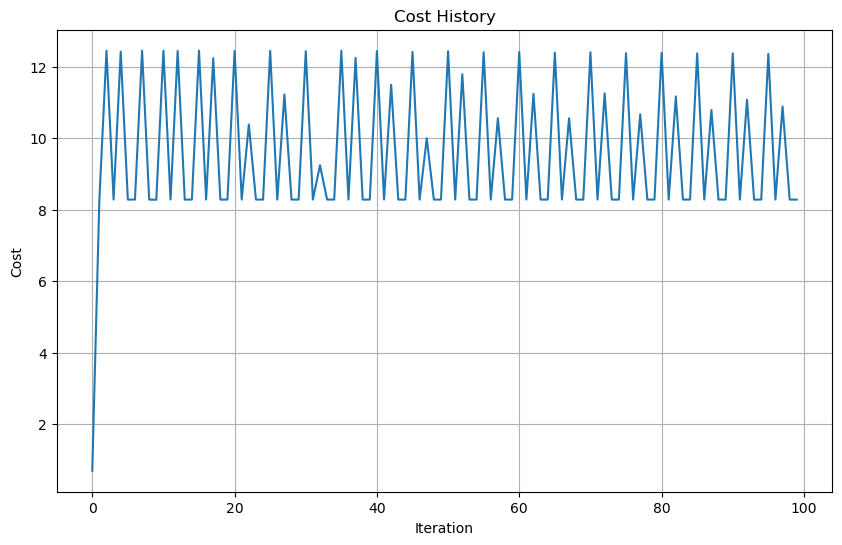

Training Accuracy: 40.29%


In [8]:
# Gradient Descent

unique_classes = np.unique(y)  
y = (y == unique_classes[0]).astype(int)  # Convert to 0 and 1

# Add bias term
X = np.hstack([np.ones((X.shape[0], 1)), X])
print("X shape:", X.shape)
print("y shape:", y.shape)

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

# Initialize parameters
weights = np.zeros(X.shape[1])  # 6 weights (5 features + 1 bias)
learning_rate = 0.01
num_iterations = 100

# Lists to store cost history
cost_history = []

# Gradient Descent
for i in range(num_iterations):
    # Forward propagation
    z = np.dot(X, weights)
    predictions = sigmoid(z)
    
    # Calculate cost (binary cross-entropy)
    cost = -np.mean(y * np.log(predictions + 1e-9) + (1-y) * np.log(1 - predictions + 1e-9))
    cost_history.append(cost)
    
    # Calculate gradients
    gradients = np.dot(X.T, (predictions - y)) / len(y)
    
    # Update weights
    weights = weights - learning_rate * gradients
    
    # Print progress every 10 iterations
    if i % 10 == 0:
        print(f"Iteration {i}, Cost: {cost}")

# Plot cost history
plt.figure(figsize=(10, 6))
plt.plot(cost_history)
plt.title('Cost History')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.grid(True)
plt.show()

# Make predictions on training data
final_predictions = sigmoid(np.dot(X, weights))
predicted_classes = (final_predictions >= 0.5).astype(int)

# Calculate accuracy
accuracy = np.mean(predicted_classes == y)
print(f"Training Accuracy: {accuracy * 100:.2f}%")

In [ ]:
# random forest has been shown in the previous notebook

In [6]:
# SVM

from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from joblib import parallel_backend

svm_model = SVC(
    kernel='rbf',           
    C=10,                   
    gamma='scale',          
    cache_size=2000,        
    random_state=42
)

svm_model.fit(X_train, y_train)

print("\nSupport Vector Machine Classification Results")
print("="*50)
print("\nModel Performance on Test Set:")
print("-"*30)
y_pred = svm_model.predict(X_test)
print(classification_report(y_test, y_pred))
print("="*50)


Support Vector Machine Classification Results

Model Performance on Test Set:
------------------------------
              precision    recall  f1-score   support

          No       0.53      0.73      0.62     10560
       Short       0.64      0.28      0.39      9283
 Substantial       0.66      0.80      0.72      6885

    accuracy                           0.59     26728
   macro avg       0.61      0.60      0.58     26728
weighted avg       0.61      0.59      0.56     26728



# Classification Models Performance Comparison

Below is a comparison of the performance metrics for the four classification models applied to the dataset:

| **Model**                         | **Accuracy** | **Macro Avg F1-Score** | **Weighted Avg F1-Score** | **F1-Score (No)** | **F1-Score (Short)** | **F1-Score (Substantial)** |
|-----------------------------------|--------------|------------------------|---------------------------|-------------------|----------------------|----------------------------|
| **Logistic Regression (LR)**      | 54%          | 0.55                   | 0.54                      | 0.54              | 0.45                 | 0.66                       |
| **Decision Tree (DT)**            | 55%          | 0.52                   | 0.51                      | 0.60              | 0.28                 | 0.68                       |
| **Gradient Descent (GD)**         | 40.29% (Training) | N/A                    | N/A                       | N/A               | N/A                  | N/A                        |
| **Support Vector Machine (SVM)**  | 59%          | 0.58                   | 0.56                      | 0.62              | 0.39                 | 0.72                       |

## Summary of Model Performance

- **Support Vector Machine (SVM)**
  - **Best Accuracy (59%)** and balanced F1-scores for "No" (0.62) and "Substantial" (0.72).
  - **Weakness:** Lower F1-score for "Short" (0.39).

- **Decision Tree (DT)**
  - **Moderate Accuracy (55%)** with strong performance on "No" (0.60) and "Substantial" (0.68).
  - **Weakness:** Poor classification of "Short" (0.28).

- **Logistic Regression (LR)**
  - **Accuracy of 54%** with decent F1-scores for "No" (0.54) and "Substantial" (0.66).
  - **Weakness:** Moderate performance on "Short" (0.45).

- **Gradient Descent (GD)**
  - **Low Training Accuracy (40.29%)**, indicating potential underfitting or optimization issues.
  - **Insufficient metrics** for comprehensive evaluation.

## Reasons for Performance Differences

- **Class Imbalance:** "Short" class consistently underperforms across models.
- **Model Complexity:** SVM handles complex patterns better, leading to higher accuracy.
- **Optimization Issues:** GD shows low training accuracy, possibly due to improper tuning or convergence problems.
